In [73]:
# importing extensions
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
import sympy as smp
import scipy.optimize as opt

smp.init_printing()

# defining constants

k_b = 1.3* 10**(-23) # unit: (m^2*kg)/(s^2*K^1) 

# defining function

def f(v, N, T, m, k_b):
    return (N * smp.exp(((-1)*(v**2)*m)/(2*k_b*T))*4*smp.pi*v**2)

The normalization constant makes sure, that the function integrated over the whole area equals 1, therefore we can calculate it, by calculating the definite integral from $-\infty$ to $+\infty$ and making it equal 1.

N = [sqrt(2)*m**(3/2)/(8*pi**(3/2)*T**(3/2)*k_b**(3/2))] 
And also a prettier symbolize output:


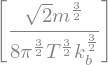

In [74]:
# determining the normalization constant N

N, T, m, k_b = smp.symbols('N T m k_b', real = True, positive = True)
f = N * smp.exp(((-1)*(v**2)*m)/(2*k_b*T))*4*smp.pi*v**2
f_int = smp.integrate(f, (v, -(smp.oo), smp.oo))
N = smp.solve(f_int-1, N)
print(f'N = {N} \nAnd also a prettier symbolize output:')
N

A)

The most probable velocity $v_m$ ist the maximum of $f(v)$. We have to calculate the derivative and make it equal 0.

the most probable velocity v_m is v_m(m, T) = [sqrt(2)*m**(3/2)/(8*pi**(3/2)*T**(3/2)*k_b**(3/2))] 
And again the symbolized output:


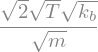

In [75]:
#N = m**(3/2)/(2**(5/2)*smp.pi**(3/2)*T**(3/2)*k_B**(3/2))
v_m = smp.solve(smp.diff(f,v), v)
print(f'the most probable velocity v_m is v_m(m, T) = {N} \nAnd again the symbolized output:')
v_m[0]

B)

The mean of a value $x$ of a distribution $f(x)$ is given by 
\begin{equation}
    E[X] = \int_{-\infty}^{+\infty} x f(x) \,dx
\end{equation}

In [76]:
#calculating the mean of v
N_1 = smp.symbols('N_1', real = True, positive = True)
f_v = N_1 * smp.exp(-v**2*v_m[0]**(-1))*4*smp.pi*v**2
v_mean = smp.integrate(f_v*v, (v, -(smp.oo), smp.oo))
print(f'the mean of the velocity is v_mean = {v_mean}')

the mean of the velocity is v_mean = 0


C)

In [77]:
#The median is the distributions 0.5-quantile


D)